# ML Finding Optimal Model and Hyperparameters

For digits dataset in sklearn.dataset, please try following classfiers and find out one that gives best performance. Also find the optimal parameters for that classifier.

In [1]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier

In [2]:
from sklearn import datasets
digit = datasets.load_digits()

In [3]:
dir(digit)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [4]:
digit.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [5]:
digit.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

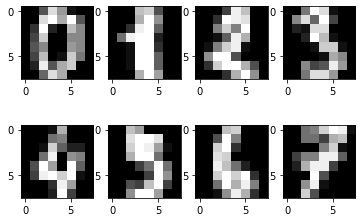

In [6]:
import matplotlib.pyplot as plt
for i in range(8):
    #plt.figure(figsize=(8,8))
    plt.subplot(2,4, i+1)
    plt.gray()
    plt.imshow(digit.images[i])

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digit.data, digit.target, test_size=0.2)

In [8]:
log_clf = LogisticRegression()
log_clf.fit(x_train, y_train)
log_clf.score(x_test, y_test)

c:\Users\Z510\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9527777777777777

# APPROACH 2: USING CROSS VALIDATION SCORE

In [10]:
import numpy as np
from sklearn.model_selection import cross_val_score

score_1 = cross_val_score(svm.SVC(kernel='rbf', C=30, gamma='auto'), digit.data, digit.target, cv=5)
print(score_1)
print(np.mean(score_1))

[0.45277778 0.46944444 0.47910864 0.47910864 0.50139276]
0.47636645001547506


CROSS VALIDATION FOR SVM BY USING FOR LOOP (WITHOUT USING GridSearchCV) 

In [13]:
# cross_val_score(model(), x ,y, cv)
kernel = ['linear', 'rbf']
C = [1,30,50]
avg_scores = {}
for k_val in kernel:
    for c_val in C:
        cv_scores = cross_val_score(svm.SVC(kernel=k_val, C=c_val, gamma = 'auto'), digit.data, digit.target, cv=5)
        avg_scores[k_val + '_' + str(c_val)] = np.average(cv_scores)


print(avg_scores)


{'linear_1': 0.9476973073351903, 'linear_30': 0.9476973073351903, 'linear_50': 0.9476973073351903, 'rbf_1': 0.448545341999381, 'rbf_30': 0.47636645001547506, 'rbf_50': 0.47636645001547506}


In [9]:
score_2 = cross_val_score(LogisticRegression(solver = 'liblinear', multi_class='auto', C=10), digit.data, digit.target, cv =5)
print(score_2)
print(np.mean(score_2))

[0.91666667 0.875      0.94150418 0.95543175 0.90529248]
0.9187790157845868


# APPROACH 3: Cross_val_score by using GRIDSEARCHCV

In [15]:
from sklearn.model_selection import GridSearchCV

# grid = GridSearchCV(model(), params_dict, cv)
# grid.fit(x, y)
# grid.cv_results_

grid = GridSearchCV(svm.SVC(gamma='auto'), {
    'kernel': ['linear', 'rbf'],
    'C': [1,30,50]
}, cv = 5)

grid.fit(digit.data, digit.target)
grid.cv_results_


{'mean_fit_time': array([0.09336786, 0.45773492, 0.03677855, 0.39417214, 0.03758397,
        0.39697037]),
 'std_fit_time': array([0.02202196, 0.1352955 , 0.00365277, 0.02508287, 0.00149232,
        0.02617151]),
 'mean_score_time': array([0.02218709, 0.09976888, 0.00959477, 0.10054426, 0.00938826,
        0.10014219]),
 'std_score_time': array([0.01594543, 0.00129189, 0.00102034, 0.00101649, 0.00079608,
        0.00097909]),
 'param_C': masked_array(data=[1, 1, 30, 30, 50, 50],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['linear', 'rbf', 'linear', 'rbf', 'linear', 'rbf'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1, 'kernel': 'linear'},
  {'C': 1, 'kernel': 'rbf'},
  {'C': 30, 'kernel': 'linear'},
  {'C': 30, 'kernel': 'rbf'},
  {'C': 50, 'kernel': 'linear'},
  {'C': 50, 'kernel': 'rbf'}],


In [16]:
import pandas as pd
df = pd.DataFrame(grid.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.093368,0.022022,0.022187,0.015945,1,linear,"{'C': 1, 'kernel': 'linear'}",0.963889,0.919444,0.966574,0.963788,0.924791,0.947697,0.020978,1
1,0.457735,0.135295,0.099769,0.001292,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.411111,0.450000,0.454039,0.448468,0.479109,0.448545,0.021761,6
2,0.036779,0.003653,0.009595,0.001020,30,linear,"{'C': 30, 'kernel': 'linear'}",0.963889,0.919444,0.966574,0.963788,0.924791,0.947697,0.020978,1
3,0.394172,0.025083,0.100544,0.001016,30,rbf,"{'C': 30, 'kernel': 'rbf'}",0.452778,0.469444,0.479109,0.479109,0.501393,0.476366,0.015784,4
4,0.037584,0.001492,0.009388,0.000796,50,linear,"{'C': 50, 'kernel': 'linear'}",0.963889,0.919444,0.966574,0.963788,0.924791,0.947697,0.020978,1
5,0.396970,0.026172,0.100142,0.000979,50,rbf,"{'C': 50, 'kernel': 'rbf'}",0.452778,0.469444,0.479109,0.479109,0.501393,0.476366,0.015784,4


In [18]:
df[['param_C', 'param_kernel', 'mean_test_score']]

,param_C,param_kernel,mean_test_score
0,1,linear,0.947697
1,1,rbf,0.448545
2,30,linear,0.947697
3,30,rbf,0.476366
4,50,linear,0.947697
5,50,rbf,0.476366


In [20]:
grid.best_params_

{'C': 1, 'kernel': 'linear'}

In [19]:
grid.best_score_

0.9476973073351903